<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%EA%B5%B0%EC%A7%91%ED%99%94_%EC%8B%A4%EC%8A%B5_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EA%B7%B8%EB%A8%BC%ED%85%8C%EC%9D%B4%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine-Learning/Online Retail.xlsx'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(path)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df[df['Quantity']<=0]['InvoiceNo']

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 10624, dtype: object

In [11]:
df = df[df['Country']=='United Kingdom']
df['Country'].value_counts()

United Kingdom    495478
Name: Country, dtype: int64

In [15]:
exlist = []
for i,cid in enumerate(df['CustomerID']):
    try:
        c = int(cid)
    except:
        exlist.append([i,cid])

In [16]:
len(exlist)

133600

In [17]:
import math
math.isnan(exlist[0][1])

True

In [18]:
fil = df['CustomerID'].notnull()
df = df[fil]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [23]:
df['sale_amount'] = df['Quantity']*df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 361878 entries, 0 to 541893
Series name: CustomerID
Non-Null Count   Dtype
--------------   -----
361878 non-null  int64
dtypes: int64(1)
memory usage: 5.5 MB


In [24]:
css = df.groupby('CustomerID')['sale_amount'].sum()
css.sort_values()[::-1]

CustomerID
18102    256438.49
17450    187482.17
17511     88125.38
16684     65892.08
13694     62653.10
           ...    
15823      -840.76
17603     -1165.30
14213     -1192.20
15369     -1592.49
17448     -4287.63
Name: sale_amount, Length: 3950, dtype: float64

In [25]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.0283604908240456

In [26]:
cdg = df.groupby('CustomerID')

In [32]:
invoice_no = cdg['InvoiceNo'].count()
invoice_date = cdg['InvoiceDate'].max()
sale_amount = cdg['sale_amount'].sum()

In [33]:
cdf = pd.DataFrame()
cdf['Frequency'] = invoice_no
cdf['Recency'] = invoice_date
cdf['Monentary'] = sale_amount
cdf = cdf.reset_index()
cdf.head(3)

,CustomerID,Frequency,Recency,Monentary
0,12346,2,2011-01-18 10:17:00,0.00
1,12747,103,2011-12-07 14:34:00,4196.01
2,12748,4642,2011-12-09 12:20:00,29072.10


In [34]:
import datetime as dt

In [35]:
cdf['Recency'] = dt.datetime(2011,12,10) - cdf['Recency']
cdf['Recency'] = cdf['Recency'].apply(lambda x: x.days+1)
cdf.head(3)

,CustomerID,Frequency,Recency,Monentary
0,12346,2,326,0.00
1,12747,103,3,4196.01
2,12748,4642,1,29072.10


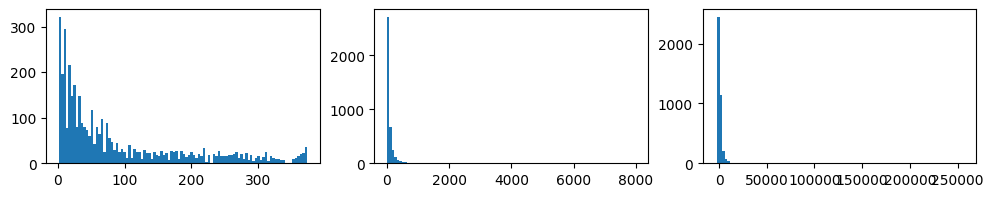

In [37]:
_,axes = plt.subplots(ncols=3,figsize=(12,2))
axes[0].hist(cdf['Recency'],bins=100)
axes[1].hist(cdf['Frequency'],bins=100)
axes[2].hist(cdf['Monentary'],bins=100)
plt.show()

In [38]:
cdf.describe()

,CustomerID,Frequency,Recency,Monentary
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,15562.029367,91.614684,92.323038,1713.385669
std,1576.848325,220.557389,100.236848,6548.608224
min,12346.000000,1.000000,1.000000,-4287.630000
25%,14208.250000,17.000000,17.000000,282.255000
50%,15571.500000,41.000000,51.000000,627.060000
75%,16913.750000,101.000000,144.000000,1521.782500
max,18287.000000,7983.000000,374.000000,256438.490000


In [39]:
x = cdf.drop('CustomerID',axis=1).values

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()
sx = ss.fit_transform(x)

In [42]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 0 ... 1 1 1]


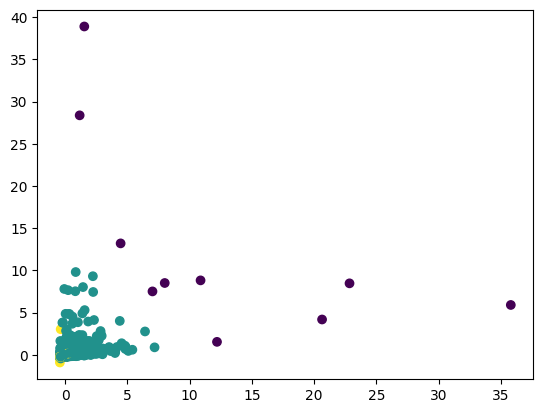

In [44]:
model = KMeans(n_clusters=3)
model.fit(sx)
print(model.labels_)
plt.scatter(sx[:,0],sx[:,2],c=model.labels_)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
silhouette_score(sx,model.labels_)

0.585612104945189

In [48]:
x[:,0] = np.log1p(x[:,0])
x[:,1] = np.log1p(x[:,1])
x[:,2] = np.log1p(x[:,2])

<ipython-input-48-624de553f5c6>:3: RuntimeWarning: invalid value encountered in log1p
  x[:,2] = np.log1p(x[:,2])


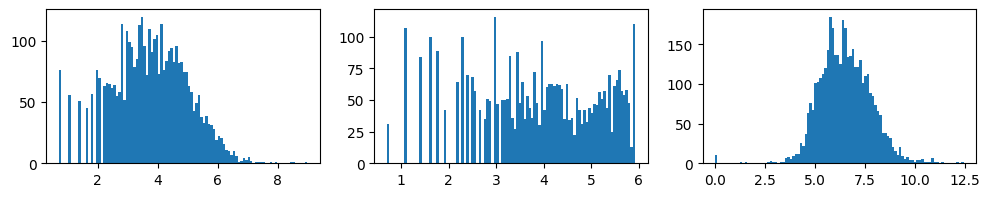

In [49]:
_,axes = plt.subplots(ncols=3,figsize=(12,2))
axes[0].hist(x[:,0],bins=100)
axes[1].hist(x[:,1],bins=100)
axes[2].hist(x[:,2],bins=100)
plt.show()

In [52]:
df = pd.DataFrame(x,columns=['a','b','c'])
df['c'] = df['c'].fillna(df['c'].min())
df['c'].info()
x = df.values

<class 'pandas.core.series.Series'>
RangeIndex: 3950 entries, 0 to 3949
Series name: c
Non-Null Count  Dtype  
--------------  -----  
3950 non-null   float64
dtypes: float64(1)
memory usage: 31.0 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 2 ... 1 2 1]


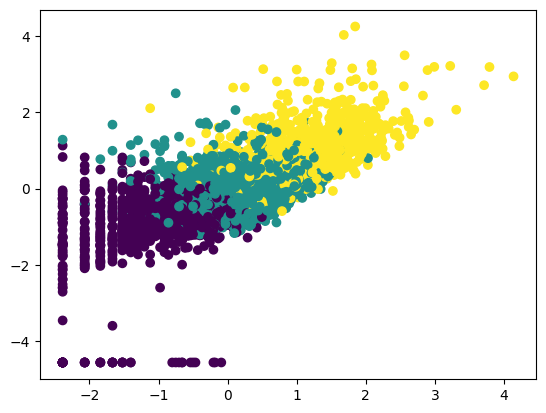

In [53]:
ss = StandardScaler()
sx = ss.fit_transform(x)
model = KMeans(n_clusters=3)
model.fit(sx)
print(model.labels_)
plt.scatter(sx[:,0],sx[:,2],c=model.labels_)
plt.show()